In [62]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.html.widgets as weejet

matplotlib.rcParams.update({'font.size': 16,
                           'xtick.direction': 'out',
                           'ytick.direction': 'out'})

In [4]:
fpath = '/nuwa_cluster/home/jackyu/climate_models/scam/examples/arm95_LWclirad_SWrrtmg/test/reff.dat'

In [29]:
df = pd.read_csv(fpath, sep = r'\s+',
                 header = 0,
           index_col = [0, 1, 2])

df.index = df.index.droplevel(level = 1)
df.index.names = ['timestep', 'layer']

df = df.sortlevel(1).sortlevel(0)

In [86]:
df.describe()

,reff_liq,reff_ice,reff_snw
count,38037.000000,38037.000000,38037.000000
mean,8.647512,47.427350,97.780913
std,4.311819,29.498854,372.552632
min,0.000000,0.000000,0.000000
25%,10.000000,50.000000,0.000000
50%,10.000000,50.000000,0.000000
75%,10.000000,50.000000,0.000000
max,28.900000,1310.000000,2630.000000


In [101]:
def histogram_reff(state = 'liq', bins = 40, logy = True):
    ax = df['reff_' + state]\
    .plot(kind = 'hist', alpha = 0.5, bins = bins, logy = logy)
    ax.set_xlabel('reff_' + state)
    ax.set_ylabel('frequency')
    return ax

<a list of 1 Line2D objects>

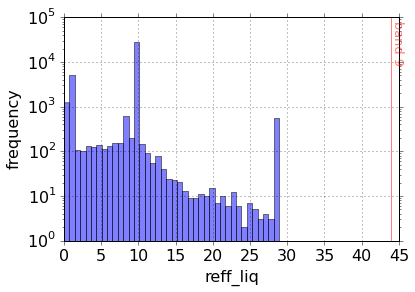

In [113]:
ax = histogram_reff(state = 'liq')
ax.axvline(x = 44, color = 'r', alpha = .5, label = 'band 1')
ax.text(x = 44, y = .5e5, s = 'band 9', rotation = -90, color = 'r',
       size = 13, alpha = 0.5)
ax.get_lines()


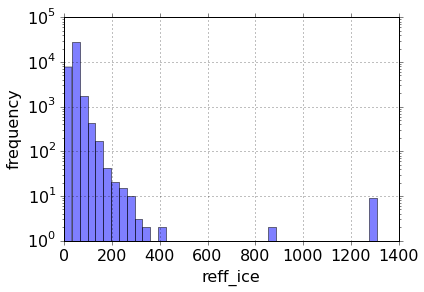

In [98]:
histogram_reff(state = 'ice')

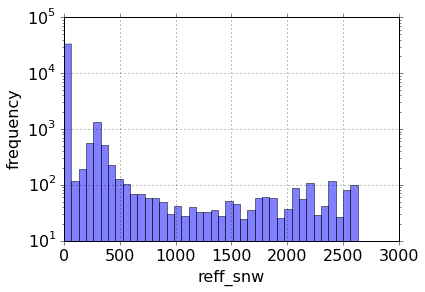

In [99]:
histogram_reff(state = 'snw')

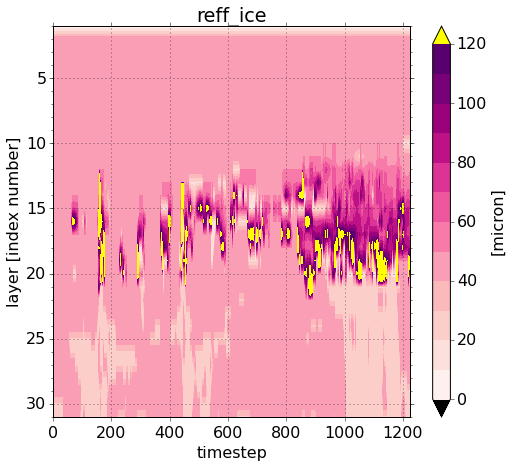

In [72]:
def contourf_reff(df, state = 'ice',
                 vmin = 0, vmax = 30, Nv = 11):
    name = 'reff_' + state
    dff = df[name].unstack(0)
    dff.reindex(index = range(1, len(dff.index) + 1),
               columns = range(len(dff.columns)))
    
    x = dff.columns.values
    y = dff.index.values
    Z = dff.values
    
    fig = plt.figure(figsize = (8, 7), dpi = 300)
    ax = fig.add_subplot(111,
                        title = name)
    
    cs = ax.contourf(x, y[1:], Z[1:], 
                     cmap = plt.get_cmap('RdPu'),
                    levels = np.linspace(vmin, vmax, Nv),
                    extend = 'both')
    
    cs.cmap.set_under('black')
    cs.cmap.set_over('yellow')
    
    cbar = plt.colorbar(cs, ax = ax)
    cbar.set_label('[micron]')
    
    ax.invert_yaxis()
    ax.yaxis.grid(which = 'major', b = True)
    ax.set_ylabel('layer [index number]')
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
    
    ax.xaxis.grid(which = 'major', b = True)
    ax.set_xlabel('timestep')
    
contourf_reff(df, vmax = 120, Nv = 13)